
<h1><center>EDSA Advanced Regression Predict Notebook</center></h1>


# Table Of Contents

* [1. Introduction](#Intro)
     - [1.1 Context](#Context)
     - [1.2 Problem Statement](#Proble_Statement)
     - [1.3 Data Description](#Datasets)
* [2. Data Cleaning and Exploration](#EDA)
    - [2.1 Importing Libraries](#Import_Libraries)
    - [2.2 Import and Examine Data](#Examine_Data)
    - [2.3 Cleaning Training Data](#Cleaning_Data)
    - [2.4 Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [3. Feature Selection](#Feature_Selection)
    - [3.1 Encoding Dummy Variables](#Encoding_Dummy_Variables)
    - [3.2 Correlations](#Correlations)
    - [3.3 Non linear model feature selection](#Non_linear_model_feature_selection)
* [4. Model Fitting](#Model_Fitting)
    - [4.1 Linear Regression Models](#Linear_Regression_Models)
    - [4.2 Non-Linear Regression Models](#Non_Linear_Regression_Models)
    - [4.3 Comparison of model statistics](#Comparison_of_model_statistics)
* [5. Conclusion](#Conclusion)
* [6. Preparation of submission data](#Preparation_of_submission_data)


## 1. Introduction
### 1.1 Context
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season? 

### 1.2 Problem Statement
With the context, we are being challenged with the task of creating a Machine Learning model that is able to predict accurately how much a kilogram of Golden Delicious Apples will cost, given certain parameters. 

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.



### 1.3 Data Description
#### 1.3.1 Data Source
The collection of this data which we use as our data source was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs, which was provided by Kaggle(https://www.kaggle.com/c/edsa-apple-prices-challenge/data).

#### 1.3.2 Data Input Files
* df-train_set.csv - The training split of the dataset, denoted as "train_data" in our code.
* df-test_set.csv - The test split of the dataset, denoted as "test_data" in our code.
* sample_submission.csv - Sample of the submission format for the hackathon.

#### 1.3.3 Data Fields
* Province - Which province the produce was grown
* Container - The code for the type of container
* Size_Grade - The class of the produce according to their quality
* Weight_Kg - The total weight in kilograms
* Commodities - The type of produce, e.g. Golden Delicious Apples
* Date - The date of the sale
* Sales_Total - The total sales price
* Total_Qty_Sold - The number of produce sold
* Total_Kg_Sold - The total weight of the produce sold in kilograms
* Stock_On_Hand - The amount of produce the store has
* Avg_Price_Per_Kg - The average price per kilogram


## 2. Data Cleaning and Exploration
### 2.1 Import Relevant Libraries/Packages

In [63]:
# Import packages we need to solve this challenge

#Data Analysis
import pandas as pd
import numpy as np

#Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Machine Learning Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler


pd.set_option("display.max_columns",200)

### 2.2 Import and examine data

We begin with loading in our train and test data sets.

In [64]:
#Load Train Data
train_data = pd.read_csv('df-train_set.csv')

In [65]:
# Load Test Data
test_data = pd.read_csv('df-test_set.csv')
test_ID = test_data['Index']
test_data = test_data.drop(columns='Index', axis=1)

In [66]:
#Print training data head
train_data.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [67]:
#Training data dimensions
train_data.shape

(64376, 13)

With an initial look at the data, we can see that the training dataset is quite large that may contain more than we are looking to investigate. We can see each of the columns that were previously described, and our outcome variable, avg_price_per_kg.

In [68]:
train_data.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


The table above shows that some of the columns have infinite values and empty cells, this is due to the dataset not being clean.

### 2.3 Clean training data

In [69]:
#Check training data if there are null values
train_data.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

We can see that, while there are no nulls in the data, there are some infinite values in the avg_price_per_kg column that may need to be replaced if they are within the subset of the data we will be using. We also will change the name of the avg_price_per_kg column in order to keep it consistent with the formatting of the rest of the columns.

In [70]:
#Inconsistent Column names
train_data.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

In [71]:
#Fixing the above
train_data = train_data.rename(columns={'avg_price_per_kg':'Avg_Price_Per_Kg'})
train_data.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Avg_Price_Per_Kg'],
      dtype='object')

The 'Commodities' column has several different products in it. However, for this challenge we are only interested in data about Golden Delicious Apples ("APPLE GOLDEN DELICIOUS" in the dataset). Therefore, we create a subset of the original dataframe containing only the data for these apples.

In [72]:
#filter the dataframe for only Golden Delicious Apples
golden_apples=train_data['Commodities'] =="APPLE GOLDEN DELICIOUS"
train_data_ga=train_data[golden_apples]

In [73]:
train_data_ga

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Avg_Price_Per_Kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,APPLE GOLDEN DELICIOUS,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78


We replace any missing values in the dataset with the mean. We look again at whether our subsetted dataframe still has any missing values that need to be replaced.

In [74]:
train_data_ga=train_data_ga.fillna(train_data_ga.mean())

In [75]:
#define function to build a table that returns missing values (number and percent of total)

def missing_val_table(df):
    
    #total missing
    tot_missing=df.isna().sum()
    
    #as a percentage of total values
    tot_missing_perc=(tot_missing/len(df))*100
    
    #create the table
    tbl=pd.concat([tot_missing, tot_missing_perc], axis=1)
    tbl=tbl.rename(columns={0: 'Total Missing Values', 1: 'Percent of Total Missing'})
    
    #show only the ones that do have values missing (i.e. do not have 0 values missing)
    tbl=tbl[tbl.iloc[:,1] !=0]
    tbl=tbl.sort_values('Percent of Total Missing', ascending=False).round(3)
    
    return tbl

In [76]:
missing_val_table(train_data_ga)

,Total Missing Values,Percent of Total Missing


There are no missing values in the data. 

Another aspect we can consider is potential outliers in the data. We can remove outliers by considering any datapoint that lies more than three standard deviations away from the column's mean an outlier. We detect this by converting the data to z-scores, and selecting those < 3.

In [77]:
from scipy import stats

def remove_outliers(df):
    
    #select only numeric data otherwise it won't run
    numerical=df.select_dtypes(include="number")
    
    #convert them all to z scores
    zscore=stats.zscore(numerical)
    zscore_abs=np.abs(zscore)
    
    #filter for only those that have a z score below 3 (i.e. is less than 3stdevs away from the mean)
    non_outliers=(zscore_abs<3).all(axis=1)
    new_df=df[non_outliers]
 
    return new_df

In [78]:
train_data_g = remove_outliers(train_data_ga)
train_data_g.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Avg_Price_Per_Kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
80,CAPE,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11


We can now be confident that we are working with a dataset that only contains the product we are interested in, with no null or missing values, and with outliers removed.

### 2.4 Exploratory Data Analysis

Another aspect we can consider is the date column. To make the data more easily accessible, we convert the date column to datetime, extracting the month of these dates. As there are only two years in this dataset (2019 and 2020), we can drop the year column as it would not present insightful data. The months can be converted to seasons for potenital further insight. Seasonal fluctuations may be present in some aspects of the data as we are working with produce.

In [79]:
#convert date to datetime
train_data_g['Date']=train_data_g['Date'].apply(pd.to_datetime)

In [80]:
train_data_g['Year'] = pd.DatetimeIndex(train_data_g['Date']).year
train_data_g['Month'] = pd.DatetimeIndex(train_data_g['Date']).month
train_data_g['Season']=train_data_g['Month']
train_data_g['Season'].replace({1:"Summer",
                               2:"Autumn",
                               3:"Autumn",
                               4:"Autumn",
                               5:"Winter",
                               6:"Winter",
                               7:"Winter",
                               8:"Spring",
                               9:"Spring",
                               10:"Spring",
                               11:"Summer",
                               12:"Summer"}, inplace=True)

In [81]:
train_data_g.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Avg_Price_Per_Kg,Year,Month,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,2020,9,Spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2020,4,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2020,4,Autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2020,5,Winter
80,CAPE,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11,2020,3,Autumn


In [82]:
train_data_g=train_data_g.drop(columns=['Date', 'Year'])

### Univariate Analysis

In [83]:
# This command will provide the mean, standard deviation and a five number summary of each numerical feature. 
# The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum)
# is also used for creating the box plot.

train_data_g.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Avg_Price_Per_Kg,Month
count,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000
mean,12.807998,84.650321,103.267951,13291.842966,142.383538,1839.110333,333.629889,6.926585,5.551664
std,4.066947,45.261207,52.629480,19938.188874,191.650689,2601.352286,474.022040,2.085047,2.643728
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.550000,1.000000
25%,9.000000,50.000000,60.000000,1140.000000,15.000000,180.000000,12.000000,5.560000,3.000000
50%,12.000000,72.000000,96.000000,4840.000000,65.000000,768.600000,144.000000,6.770000,6.000000
75%,18.300000,120.000000,150.000000,16590.000000,190.000000,2403.000000,443.000000,8.350000,7.000000
max,18.300000,220.000000,260.000000,132150.000000,1087.000000,19178.400000,2555.000000,13.070000,12.000000


In [84]:
train_data_g.Avg_Price_Per_Kg.describe()

count    1713.000000
mean        6.926585
std         2.085047
min         0.550000
25%         5.560000
50%         6.770000
75%         8.350000
max        13.070000
Name: Avg_Price_Per_Kg, dtype: float64

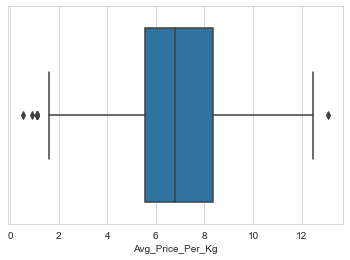

In [85]:
sns.boxplot(x='Avg_Price_Per_Kg', data=train_data_g);

<AxesSubplot:xlabel='Avg_Price_Per_Kg', ylabel='Density'>

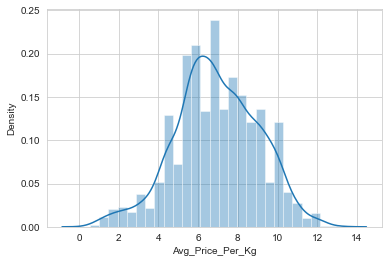

In [86]:
# target distribution
sns.distplot(train_data_g['Avg_Price_Per_Kg'],kde=True)

In [87]:
train_data_g.Avg_Price_Per_Kg.skew()

-0.12406596852535741

In [88]:
train_data_g.Avg_Price_Per_Kg.kurtosis()

-0.06788406525881863

Looking at the outcome variable, we can see that it has a relatively normal distribution. It has a skewness of <0.5 indicating a degree of symmetrical data, and a kurtosis of <3, suggesting the data is not too concentrated around the mean. 

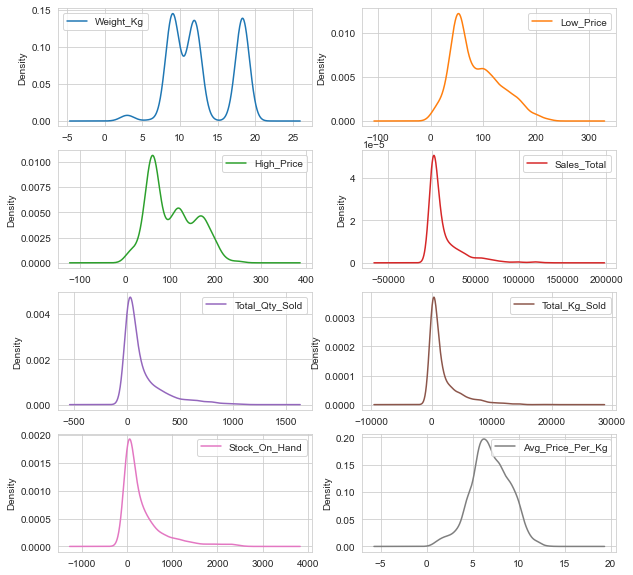

In [92]:
train_data_g[features].plot(kind='density', subplots=True, layout=(4, 2), sharex=False, figsize=(10, 10));

In [89]:
train_data_g.skew()

Weight_Kg           0.250577
Low_Price           0.678135
High_Price          0.424259
Sales_Total         2.518151
Total_Qty_Sold      2.075943
Total_Kg_Sold       2.280170
Stock_On_Hand       2.176992
Avg_Price_Per_Kg   -0.124066
Month               0.082423
dtype: float64

In [90]:
train_data_g.kurtosis()

Weight_Kg          -1.068424
Low_Price          -0.271852
High_Price         -0.827616
Sales_Total         7.429437
Total_Qty_Sold      4.397705
Total_Kg_Sold       5.872929
Stock_On_Hand       4.927424
Avg_Price_Per_Kg   -0.067884
Month              -0.605715
dtype: float64

Looking at the rest of the variables, we can see from the density plots that several do not show a normal distribution. Some have a skewness of >0.5 (Low_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, and Stock_On_Hand), and some have a kurtosis of >3 (Sales_Total, Total_Qty_Sold, Total_Kg_Sold, and Stock_On_Hand).

### Multivariate Analysis

In [93]:
train_data_g.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Avg_Price_Per_Kg,Month
Weight_Kg,1.000000,0.793893,0.882803,0.295567,0.019849,0.237463,0.107011,0.492860,-0.076332
Low_Price,0.793893,1.000000,0.872611,0.200786,-0.062253,0.097729,0.025886,0.815544,-0.011264
High_Price,0.882803,0.872611,1.000000,0.371799,0.085026,0.274045,0.160419,0.763701,-0.043925
Sales_Total,0.295567,0.200786,0.371799,1.000000,0.861513,0.967201,0.231615,0.228662,-0.122926
Total_Qty_Sold,0.019849,-0.062253,0.085026,0.861513,1.000000,0.932626,0.220947,0.011603,-0.089338
Total_Kg_Sold,0.237463,0.097729,0.274045,0.967201,0.932626,1.000000,0.233279,0.102003,-0.106014
Stock_On_Hand,0.107011,0.025886,0.160419,0.231615,0.220947,0.233279,1.000000,0.074820,-0.066755
Avg_Price_Per_Kg,0.492860,0.815544,0.763701,0.228662,0.011603,0.102003,0.074820,1.000000,0.015284
Month,-0.076332,-0.011264,-0.043925,-0.122926,-0.089338,-0.106014,-0.066755,0.015284,1.000000


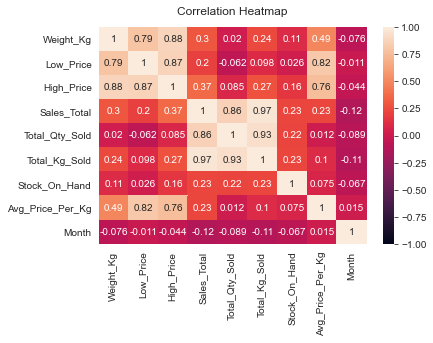

In [94]:
heatmap = sns.heatmap(train_data_g.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In this initial look at correlations, there are a range of strong and weak correlations throughout the numerical variables in the dataset. Looking specifically at those that correlate with our outcome variable, the strongest correlated are Low_Price (0.86), High_Price (0.76) and Weight_Kg (0.49).

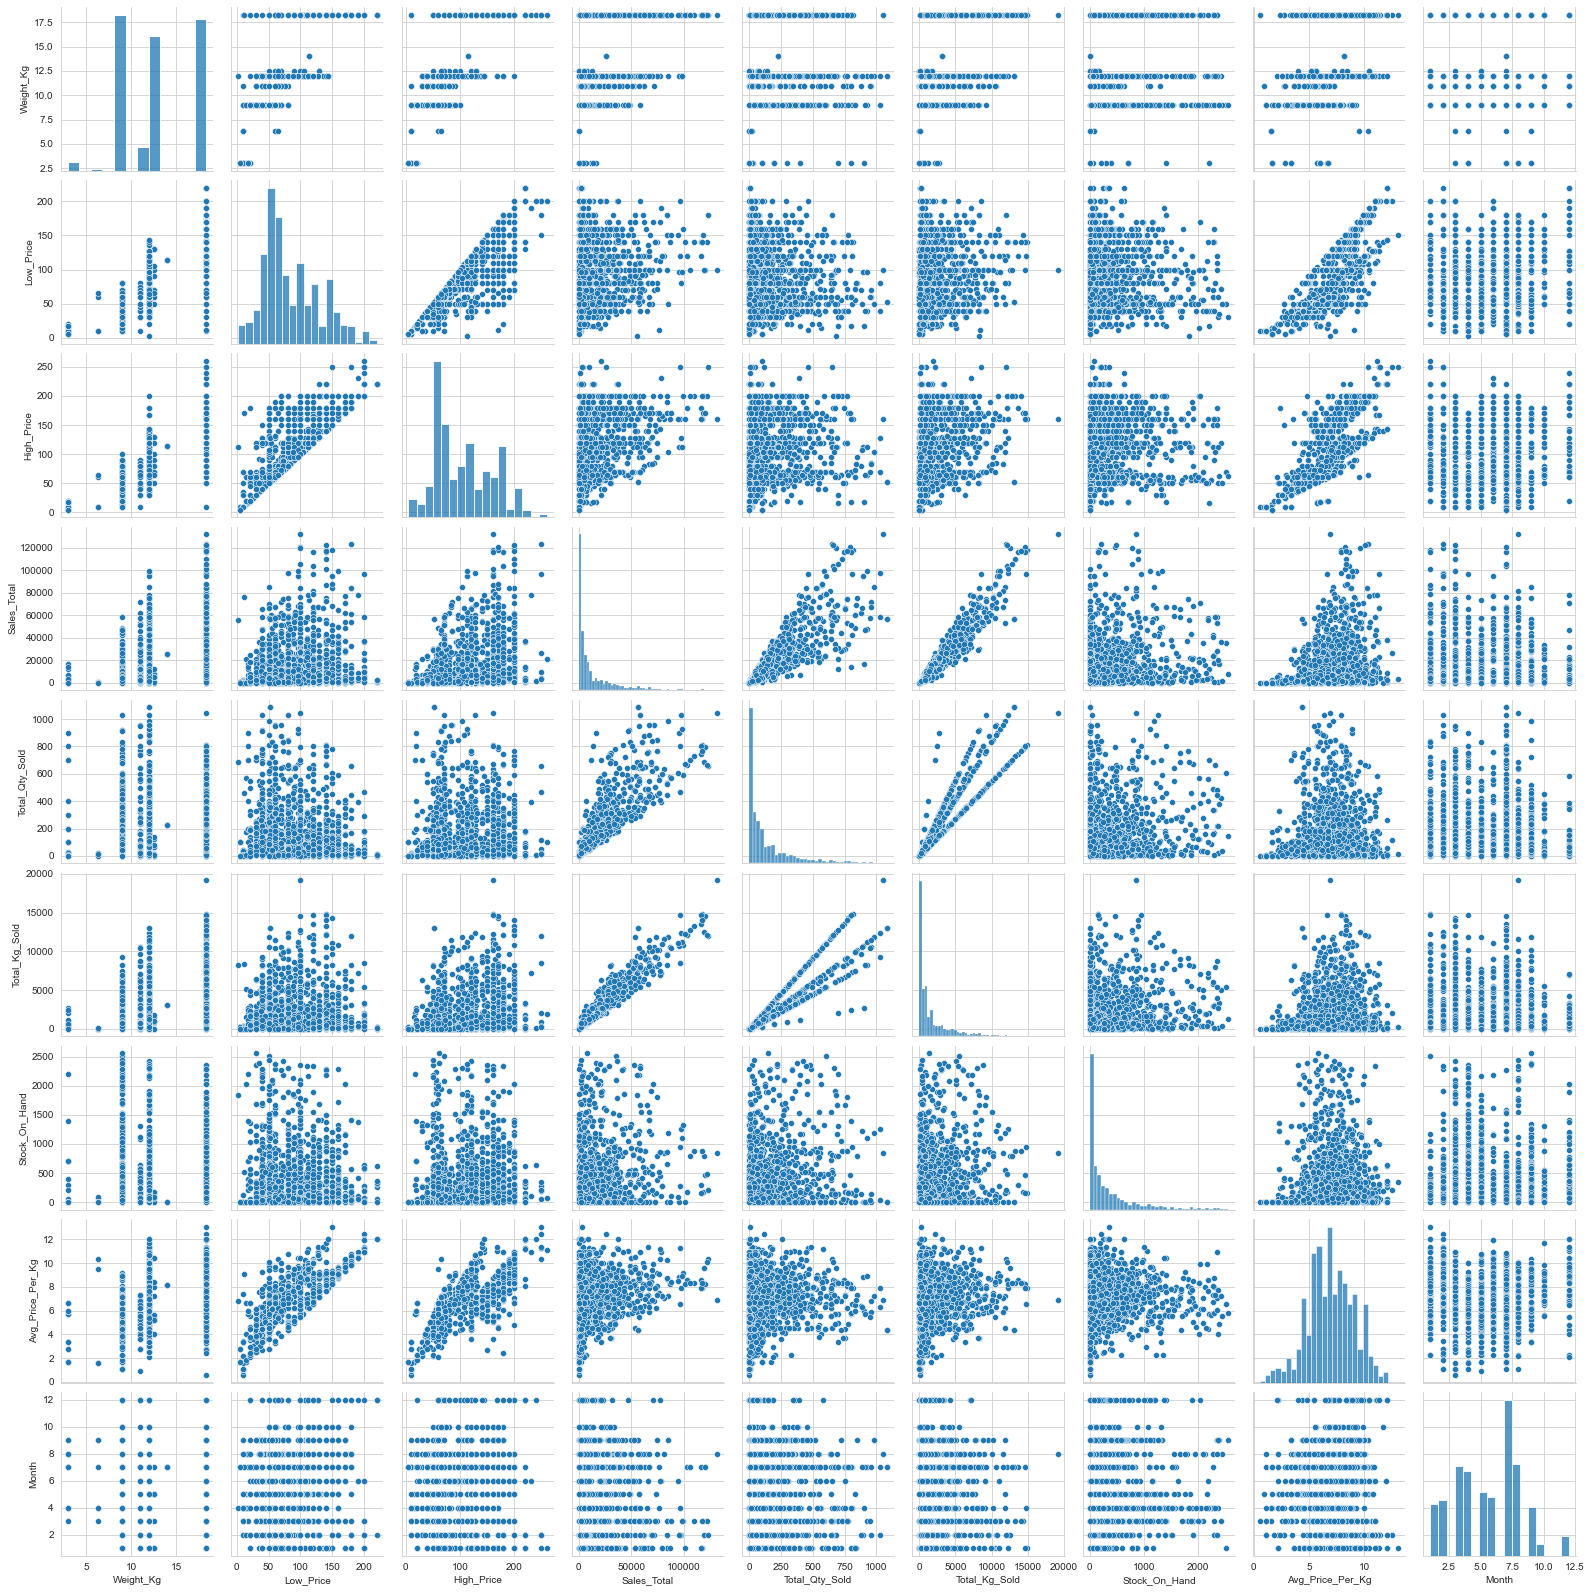

In [95]:
sns.set_style("whitegrid");
sns.pairplot(train_data_g);
plt.show();

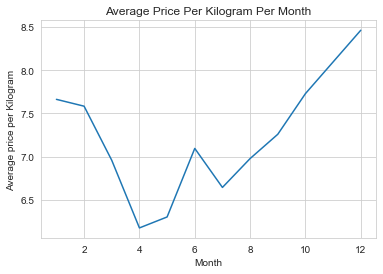

In [96]:
y=train_data_g.groupby(['Month'])['Avg_Price_Per_Kg'].mean()
plt.figure()
plt.plot(y.index, y)
plt.title("Average Price Per Kilogram Per Month")
plt.xlabel("Month")
plt.ylabel("Average price per Kilogram")
plt.show()

Examining the outcome variable over time, we can clearly see there is a trend with regards to month, with prices being lower in the middle of the year, and rising again towards end.

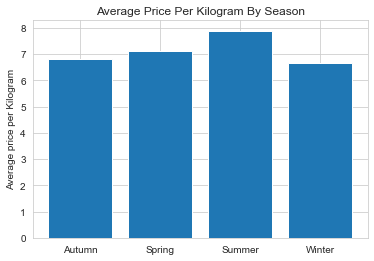

In [98]:
y=train_data_g.groupby(['Season'])['Avg_Price_Per_Kg'].mean()
plt.figure()
plt.bar(y.index, y)
plt.title("Average Price Per Kilogram By Season")
plt.ylabel("Average price per Kilogram")
plt.show()

The outcome variable shows a clear variation between seasons, as well.

[Text(0, 0.5, 'High Price')]

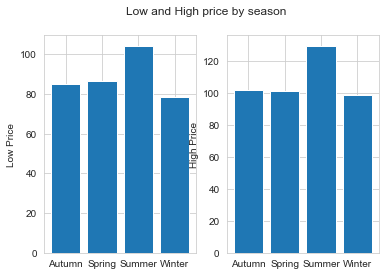

In [99]:
y=train_data_g.groupby(['Season'])['Low_Price'].mean()
z=train_data_g.groupby(['Season'])['High_Price'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Low and High price by season')
ax1.bar(y.index, y)
ax1.set(ylabel='Low Price')
ax2.bar(z.index, z)
ax2.set(ylabel='High Price')

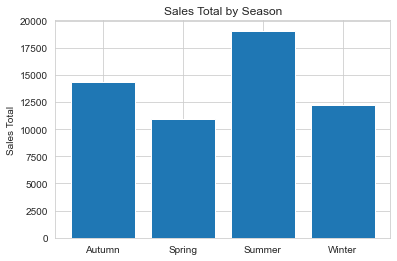

In [100]:
y_bar=train_data_g.groupby(['Season'])['Sales_Total'].mean()
plt.figure()
plt.bar(y_bar.index, y_bar)
#plt.xticks(rotation=90)
plt.title("Sales Total by Season")
plt.ylabel("Sales Total")
plt.show()

Low_Price, High_Price and Sales_Total all also show variation amongst seasons. They show slightly greater variations across seasons than Avg_Price_Per_Kg.

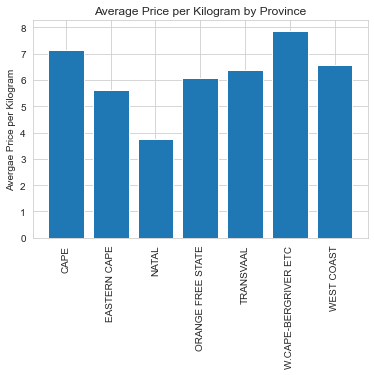

In [101]:
y_bar=train_data_g.groupby(['Province'])['Avg_Price_Per_Kg'].mean()
plt.figure()
plt.bar(y_bar.index, y_bar)
plt.xticks(rotation=90)
plt.ylabel("Avergae Price per Kilogram")
plt.title("Average Price per Kilogram by Province")
plt.show()

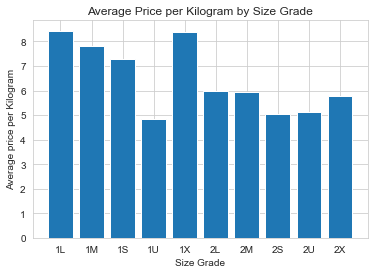

In [102]:
y_bar=train_data_g.groupby(['Size_Grade'])['Avg_Price_Per_Kg'].mean()
plt.figure()
plt.bar(y_bar.index, y_bar)
#plt.xticks(rotation=90)
plt.xlabel("Size Grade")
plt.ylabel("Average price per Kilogram")
plt.title("Average Price per Kilogram by Size Grade")
plt.show()

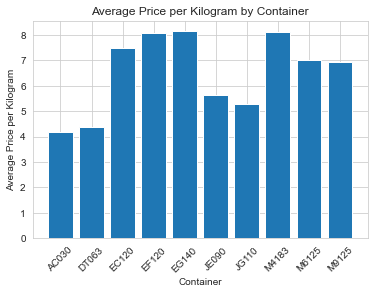

In [103]:
y_bar=train_data_g.groupby(['Container'])['Avg_Price_Per_Kg'].mean()
plt.figure()
plt.bar(y_bar.index, y_bar)
plt.xticks(rotation=45)
plt.title("Average Price per Kilogram by Container")
plt.ylabel("Average Price per Kilogram")
plt.xlabel("Container")
plt.show()

Looking at the categorical variables in relation to the outcome variable, we can clearly see that there does appear to be some relationship between our outcome variable and Province, Size Grade and Container.

# 3. Feature selection

### 3.1 Encoding dummy variables

In order to incorporate the categorical variables into our model, we encode dummy variables into the dataset for each categorical variable.

In [104]:
dummy_df = pd.get_dummies(train_data_g, drop_first=True)
dummy_df.columns = [col.replace(" ","_") for col in dummy_df.columns] 
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713 entries, 1 to 64310
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Weight_Kg                      1713 non-null   float64
 1   Low_Price                      1713 non-null   float64
 2   High_Price                     1713 non-null   float64
 3   Sales_Total                    1713 non-null   float64
 4   Total_Qty_Sold                 1713 non-null   int64  
 5   Total_Kg_Sold                  1713 non-null   float64
 6   Stock_On_Hand                  1713 non-null   int64  
 7   Avg_Price_Per_Kg               1713 non-null   float64
 8   Month                          1713 non-null   int64  
 9   Province_EASTERN_CAPE          1713 non-null   uint8  
 10  Province_NATAL                 1713 non-null   uint8  
 11  Province_ORANGE_FREE_STATE     1713 non-null   uint8  
 12  Province_TRANSVAAL             1713 non-null   

In [105]:
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Avg_Price_Per_Kg,Month,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER_ETC,Province_WEST_COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
80,9.0,55.0,55.0,4840.0,88,792.0,181,6.11,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [106]:
dummy_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Avg_Price_Per_Kg,Month,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER_ETC,Province_WEST_COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
count,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.00000,1713.000000
mean,12.807998,84.650321,103.267951,13291.842966,142.383538,1839.110333,333.629889,6.926585,5.551664,0.118506,0.047285,0.004670,0.006421,0.242849,0.073555,0.003503,0.231757,0.043199,0.001751,0.326912,0.049037,0.318739,0.005838,0.001751,0.174548,0.207823,0.001168,0.095738,0.070053,0.132516,0.168710,0.009924,0.015178,0.208406,0.09749,0.379451
std,4.066947,45.261207,52.629480,19938.188874,191.650689,2601.352286,474.022040,2.085047,2.643728,0.323300,0.212311,0.068199,0.079900,0.428930,0.261122,0.059097,0.422078,0.203364,0.041824,0.469222,0.216008,0.466124,0.076204,0.041824,0.379691,0.405868,0.034159,0.294318,0.255310,0.339150,0.374605,0.099153,0.122296,0.406287,0.29671,0.485392
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.550000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,9.000000,50.000000,60.000000,1140.000000,15.000000,180.000000,12.000000,5.560000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,12.000000,72.000000,96.000000,4840.000000,65.000000,768.600000,144.000000,6.770000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,18.300000,120.000000,150.000000,16590.000000,190.000000,2403.000000,443.000000,8.350000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,18.300000,220.000000,260.000000,132150.000000,1087.000000,19178.400000,2555.000000,13.070000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


We can see now that the number of columns has increased to 36.

### 3.2 Correlations

Examining correlations will allow us to get a better insight into any existing linear relationships in the data. As we are focussed on our outcome variable, we will look at each variable's correlation with Avg_Price_Per_Kg.

In [107]:
cor=pd.DataFrame(dummy_df.corr()['Avg_Price_Per_Kg']).rename(columns = {'Avg_Price_Per_Kg':'Correlation'})
cor.sort_values(by='Correlation', ascending=False, inplace=True)
cor

,Correlation
Avg_Price_Per_Kg,1.000000
Low_Price,0.815544
High_Price,0.763701
Weight_Kg,0.492860
Container_M4183,0.383703
Province_W.CAPE-BERGRIVER_ETC,0.257148
Size_Grade_1X,0.229983
Sales_Total,0.228662
Size_Grade_1M,0.191672
Season_Summer,0.151529


Throughout the correlations, there do not appear to be many strong relationships. We see that there are some variables that are strongly or moderately strongly correlated with Avg_Price_Per_Kg. Those with a correlation stronger than |0.4| are: 

* Low_Price
* High_Price
* Weight_Kg
* Size_Grade_2S
* Container_JE090

These therefore are potentially useful variables for the construction of a linear model to predict Avg_Price_Per_Kg.

### 3.3 Non-linear model feature selection

As well as taking the data in its raw form, we can also group data by categorical variables. As seen in the multivariate analyses, there are clearly relationships between our outcome variable and categorical variables such as Province, Season, Size Grade or Container.

In [108]:
#Group some variables by categorical variables
grouped=train_data_g.groupby(['Season', 'Province', 'Size_Grade'])

train_data_g['Avg weight by S_P_SG']=np.nan
train_data_g['Avg weight by S_P_SG']=train_data_g['Avg weight by S_P_SG'].fillna(round(grouped['Weight_Kg'].transform(np.mean), 1))

train_data_g

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Avg_Price_Per_Kg,Month,Season,Avg weight by S_P_SG
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,9,Spring,16.8
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,4,Autumn,9.7
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,4,Autumn,9.0
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,5,Winter,13.4
80,CAPE,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,4840.0,88,792.0,181,6.11,3,Autumn,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,96.0,96.0,1920.0,20,240.0,53,8.00,3,Autumn,12.0
64291,ORANGE FREE STATE,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,130.0,130.0,7280.0,56,1024.8,74,7.10,2,Autumn,18.3
64297,CAPE,JE090,2M,9.0,APPLE GOLDEN DELICIOUS,50.0,60.0,4540.0,89,801.0,793,5.67,4,Autumn,9.7
64304,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,30.0,40.0,2140.0,70,770.0,0,2.78,3,Autumn,9.7


If we have grouped by these variables, we can then drop them from this version of the dataset.

In [109]:
train_data_g=train_data_g.drop(columns=['Season', 'Province', 'Size_Grade', 'Container'])

Variables that have a correlation <0.1 with the outcome variable can too be dropped due to their weak relationship. This includes the variables 'Month', 'Total_Qty_Sold' and 'Stock_On_Hand'. As the 'Weight_Kg' variable has been transformed, the original column can be dropped as well. The 'Commodities' variable can be dropped as well, as we only have one type in this column (Golden Delicious Apples).

In [110]:
#Create the subset by dropping columns to not be included
df_subset=train_data_g.drop(columns=['Month', 'Total_Qty_Sold', 'Stock_On_Hand', 'Weight_Kg', 'Commodities'])

In [111]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713 entries, 1 to 64310
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Low_Price             1713 non-null   float64
 1   High_Price            1713 non-null   float64
 2   Sales_Total           1713 non-null   float64
 3   Total_Kg_Sold         1713 non-null   float64
 4   Avg_Price_Per_Kg      1713 non-null   float64
 5   Avg weight by S_P_SG  1713 non-null   float64
dtypes: float64(6)
memory usage: 93.7 KB


## 4. Model Fitting

We can plot several models and evaluate the accuracy of each. Following on from obtaining correlations, we will start with linear regression methods.

### 4.1 Linear Regression Models

### Linear regression with one variable

We will start off by fitting a model with only one predictor variable - the highest-correlated of the predictor variables, Low_Price.

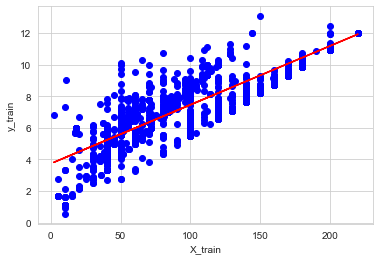

In [114]:
# Split the dataset into the response, y, and features, X
df_1 = dummy_df[['Low_Price', 'Avg_Price_Per_Kg']]
y = df_1['Avg_Price_Per_Kg']
X = df_1.drop('Avg_Price_Per_Kg', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Declare the model object
lm = LinearRegression()
# Fit the model to the training data (also known as training the model)
lm.fit(X_train, y_train)

# Generate the values that fall along our regression line
lm_train = lm.predict(X_train)

# Plot the results
plt.scatter(X_train, y_train, color='blue')  
plt.plot(X_train, lm_train, color='red')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.show()

In [115]:
# extract model intercept
beta_0 = float(lm.intercept_)
print("Intercept:", beta_0)

# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
beta_js

Intercept: 3.7389038324353034


,Coefficient
Low_Price,0.037266


In [116]:
print("Training:")
# Calculate the slope
print('Slope:', lm.coef_)
# Calculate the intercept
print('Intercept:', lm.intercept_)
# Calculate the mean-squared-error
print('RMSE:', metrics.mean_squared_error(y_train, lm_train, squared=False))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, lm_train))

Training:
Slope: [0.03726557]
Intercept: 3.7389038324353034
RMSE: 1.207093335540016
R_squared: 0.6659988310479036


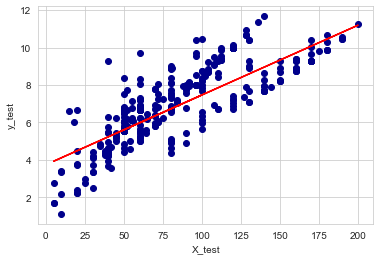

In [117]:
#Testing the model 
# Generate values of y from x, using the linear model

lm_test = lm.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='darkblue')  # Plot the testing data in blue
plt.plot(X_test, lm_test, color='red')  # Plot the line connecting the generated y-values in red
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()



In [118]:
print("Testing:")
# Calculate the slope
print('Slope:', lm.coef_)
# Calculate the intercept
print('Intercept:', lm.intercept_)
# Calculate the mean-squared-error
print('RMSE:', metrics.mean_squared_error(y_test, lm_test, squared=False))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_test, lm_test))

Testing:
Slope: [0.03726557]
Intercept: 3.7389038324353034
RMSE: 1.2055741226830263
R_squared: 0.6588594326471888


### Linear regression with five variables

We can also fit a model using the five strongest-correlated variables to produce a model with better predictive accuracy.

In [119]:
df_2 = dummy_df[['Low_Price', 'High_Price', 'Weight_Kg', 'Size_Grade_2S','Container_JE090','Avg_Price_Per_Kg']]
# split predictors and response
X = df_2.drop(['Avg_Price_Per_Kg'], axis=1)
y = df_2['Avg_Price_Per_Kg']

# create model object
lm1 = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# train model
lm1.fit(X_train, y_train)
# extract model intercept
beta_0 = float(lm1.intercept_)
print("Intercept:", beta_0)

# extract model coeffs
beta_js = pd.DataFrame(lm1.coef_, X.columns, columns=['Coefficient'])
beta_js

Intercept: 6.55656575991692


,Coefficient
Low_Price,0.030840
High_Price,0.036207
Weight_Kg,-0.458816
Size_Grade_2S,-0.523300
Container_JE090,-0.060932


In [120]:
# Generate the values that fall along our regression line
lm1_train = lm1.predict(X_train)


In [121]:
print("Training:")
# Calculate the slope
print('Slope:', lm1.coef_)
# Calculate the intercept
print('Intercept:', lm1.intercept_)
# Calculate the mean-squared-error
print('RMSE:', metrics.mean_squared_error(y_train, lm1_train, squared=False))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, lm1_train))

Training:
Slope: [ 0.03084031  0.03620705 -0.45881574 -0.52330038 -0.0609319 ]
Intercept: 6.55656575991692
RMSE: 0.7743518097255196
R_squared: 0.8625505780266597


In [122]:
#Testing the model 
#Generate values of y from x, using the linear model

lm1_test = lm1.predict(X_test)


In [123]:
print("Testing:")
# Calculate the slope
print('Slope:', lm1.coef_)
# Calculate the intercept
print('Intercept:', lm1.intercept_)
# Calculate the mean-squared-error
print('RMSE:', metrics.mean_squared_error(y_test, lm1_test, squared=False))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_test, lm1_test))

Testing:
Slope: [ 0.03084031  0.03620705 -0.45881574 -0.52330038 -0.0609319 ]
Intercept: 6.55656575991692
RMSE: 0.8107116419512567
R_squared: 0.8457311110207797


While the model with five variables faired better than the model with one variable, the RMSE scores can still be improved upon.

Following on from this, we can implement modelling techniques that use scaling and shrinkage in order to further improve the model. These methods are Ridge Regression and Lasso Regression.

### Ridge regression

In [125]:
X=df_subset.drop(['Avg_Price_Per_Kg'], axis = 1)

y=df_subset['Avg_Price_Per_Kg']

In [126]:
#scale the x variables for ridge and lasso models
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [127]:
#set up train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=9)

In [128]:
ridge=Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [129]:
#Training and testing predictions
ridge_train=ridge.predict(X_train)
ridge_test=ridge.predict(X_test)

### Lasso regression

In [130]:
#Lasso regression
#use the same X_scaled and y from ridge regression
#set up train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=9)

In [131]:
#set lasso alpha constraint
lasso=Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [132]:
#Training and testing predictions
lasso_train = lasso.predict(X_train)
lasso_test = lasso.predict(X_test)

### 4.2 Non-Linear Regression Models

While simple linear regression is often useful, we also have non-linear regression methods available to us that may prove better.

### Elastic Net

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [134]:
scaler = Normalizer()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [136]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train_scaled,y_train)   
    score = model.score(X_test_scaled,y_test)
    pred_y = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.76, MSE:1.04, RMSE:1.02
Alpha:0.0010, R2:0.74, MSE:1.11, RMSE:1.05
Alpha:0.0100, R2:0.52, MSE:2.07, RMSE:1.44
Alpha:0.1000, R2:0.07, MSE:4.04, RMSE:2.01
Alpha:0.3000, R2:-0.00, MSE:4.33, RMSE:2.08
Alpha:0.5000, R2:-0.00, MSE:4.33, RMSE:2.08
Alpha:0.7000, R2:-0.00, MSE:4.33, RMSE:2.08
Alpha:1.0000, R2:-0.00, MSE:4.33, RMSE:2.08


In [137]:
elastic=ElasticNet(alpha=0.001).fit(X_train_scaled,y_train)
el_train=elastic.predict(X_train_scaled)
el_test = elastic.predict(X_test_scaled)
score = elastic.score(X_test_scaled,y_test)
mse = mean_squared_error(y_test, el_test)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.744, MSE:1.11, RMSE:1.05


In [138]:
elastic_cv = ElasticNetCV(alphas = alphas, cv = 5)
model = elastic_cv.fit(X_train_scaled,y_train)

print('Alpha :', model.alpha_)
print('Intercept :', model.intercept_)

Alpha : 0.0001
Intercept : 13.340143986593773


### Decision Tree

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [140]:
scaler = Normalizer()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
dtr_model = DecisionTreeRegressor(max_depth=8, random_state=9)
dtr_model.fit(X_train_scaled, y_train)
dtr_train=dtr_model.predict(X_train_scaled)
dtr_test= dtr_model.predict(X_test_scaled)
print('RMSE        :',np.sqrt(mean_squared_error(y_test,dtr_test)))
print("R-squared  :", r2_score(y_test, dtr_test))

RMSE        : 0.14140692582133832
R-squared  : 0.9953793587821534


### K-Nearest Neighbours

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [143]:
scaler = Normalizer()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
from sklearn.neighbors import KNeighborsRegressor

K_nearest = KNeighborsRegressor(n_neighbors = 5)

#set up train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)

K_nearest.fit(X_train, y_train)

K_nearest_train = K_nearest.predict(X_train)

K_nearest_test = K_nearest.predict(X_test)

from sklearn.metrics import mean_squared_error

# calculate MSE
MSE = mean_squared_error(y_train, K_nearest_train)

# Report RMSE
print("Regression K_nearest model RMSE is:",np.sqrt(MSE))


Regression K_nearest model RMSE is: 0.593251623723943


### Random Forest

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [146]:
scaler = Normalizer()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
randfor = RandomForestRegressor(n_estimators = 200, random_state=9)

randfor.fit(X_train_scaled, y_train)

randfor_train=randfor.predict(X_train_scaled)
randfor_test = randfor.predict(X_test_scaled)

print('RMSE        :',np.sqrt(mean_squared_error(y_test, randfor_test)))
print("R-squared  :", r2_score(y_test, randfor_test))

RMSE        : 0.10184640664572919
R-squared  : 0.9976030867963503


### Gradient Boosting

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [149]:
scaler = Normalizer()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=9)
gb_model.fit(X_train_scaled, y_train)
gb_train=gb_model.predict(X_train_scaled)
gb_test = gb_model.predict(X_test_scaled)
print('RMSE        :',np.sqrt(mean_squared_error(y_test,gb_test)))
print("R-squared  :", r2_score(y_test, gb_test))

RMSE        : 0.0932544460226904
R-squared  : 0.9979904446196205


### 4.3 Comparison of model statistics

In [151]:

# Dictionary of results
results_dict = {'Training RMSE':
                    {
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_train, ridge_train)),
                        "LASSO": np.sqrt(metrics.mean_squared_error(y_train, lasso_train)),
                        "Elastic Net": np.sqrt(metrics.mean_squared_error(y_train, el_train)),
                        "Decision Tree": np.sqrt(metrics.mean_squared_error(y_train, dtr_train)),
                        "K Nearest Neighbours": np.sqrt(metrics.mean_squared_error(y_train, K_nearest_train)), 
                        "Random Forest": np.sqrt(metrics.mean_squared_error(y_train, randfor_train)),
                        "Gradient Boosting": np.sqrt(metrics.mean_squared_error(y_train, gb_train))
                    },
                    'Test RMSE':
 
{
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test, ridge_test)),
                        "LASSO": np.sqrt(metrics.mean_squared_error(y_test, lasso_test)),                    
                        "Elastic Net": np.sqrt(metrics.mean_squared_error(y_test, el_test)),
                        "Decision Tree": np.sqrt(metrics.mean_squared_error(y_test, dtr_test)),
                        "K Nearest Neighbours": np.sqrt(metrics.mean_squared_error(y_test, K_nearest_test)),
                        "Random Forest": np.sqrt(metrics.mean_squared_error(y_test, randfor_test)),
                        "Gradient Boosting": np.sqrt(metrics.mean_squared_error(y_test, gb_test))
                    },
                'Training R_squared':
                    {
                        "Ridge": ( metrics.r2_score(y_train, ridge_train)),
                        "LASSO": (metrics.r2_score(y_train, lasso_train)),
                        "Elastic Net": ( metrics.r2_score(y_train, el_train)),
                        "Decision Tree": (metrics.r2_score(y_train, dtr_train)),
                        "K Nearest Neighbours": (metrics.r2_score(y_train, K_nearest_train)),
                        "Random Forest": (metrics.r2_score(y_train, randfor_train)),
                        "Gradient Boosting": (metrics.r2_score(y_train, gb_train))
                    },
                    'Test R_squared':
 
{
                        "Ridge": (metrics.r2_score(y_test, ridge_test)),
                        "LASSO": (metrics.r2_score(y_test, lasso_test)),
                        "Elastic Net": (metrics.r2_score(y_test, el_test)),
                        "Decision Tree": (metrics.r2_score(y_test, dtr_test)),
                        "K Nearest Neighbours": (metrics.r2_score(y_test, K_nearest_test)),
                        "Random Forest": (metrics.r2_score(y_test, randfor_test)),
                        "Gradient Boosting": (metrics.r2_score(y_test, gb_test))
                    },
                
                }

In [152]:
results_df = pd.DataFrame(data=results_dict)
results_df

,Training RMSE,Test RMSE,Training R_squared,Test R_squared
Ridge,1.083556,1.066750,0.730036,0.737042
LASSO,1.083555,1.066838,0.730036,0.736999
Elastic Net,1.153785,1.053147,0.693907,0.743706
Decision Tree,0.101042,0.141407,0.997652,0.995379
K Nearest Neighbours,0.593252,0.677669,0.919075,0.893880
Random Forest,0.042117,0.101846,0.999592,0.997603
Gradient Boosting,0.009264,0.093254,0.999980,0.997990


## 5. Conclusion

### 5.1 Findings

#### 5.1.1 RMSE

As expected, the training RMSEs were better the test RMSEs. Of the models tested, the Gradient Boosting regression model performed the best, as it returned the lowest RMSE.

#### 5.1.2 R_squared 

The results for testing as well as training are similar for all models. The Gradient Boosting regression model performed the best accounting for 99% variance in the behavior of the outcome variable. 

The aim of this challenge was to construct a model that accurately predicted the price of Golden Delicious Apples. Through this project, we have met this aim, fitting both linear and non-linear models to the data. Through this, we have found that the Gradient Boosting regression model is able to produce very accurate predictions, with a RMSE of 0.009 on the training portion of the data, and 0.093 on the testing portion. The performance of this model may be attributed to the fact that it is an ensemble method, therefore works with an ensemble of models, in a step-wise fashion continuously adding models and improving on the errors of previous models, allowing it to return such a low RMSE.

## 6. Preparation of test data

In [153]:
# Load Test Data
test_data = pd.read_csv('df-test_set.csv')
test_ID = test_data['Index']
test_data = test_data.drop(columns='Index', axis=1)

In [154]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province        685 non-null    object 
 1   Container       685 non-null    object 
 2   Size_Grade      685 non-null    object 
 3   Weight_Kg       685 non-null    float64
 4   Commodities     685 non-null    object 
 5   Date            685 non-null    object 
 6   Low_Price       685 non-null    float64
 7   High_Price      685 non-null    float64
 8   Sales_Total     685 non-null    float64
 9   Total_Qty_Sold  685 non-null    int64  
 10  Total_Kg_Sold   685 non-null    float64
 11  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 64.3+ KB


In [155]:
#filter the dataframe for only Golden Delicious Apples
golden_apples_test=test_data['Commodities']=="APPLE GOLDEN DELICIOUS"
test_data_ga=test_data[golden_apples_test]
test_data_ga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 684
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province        685 non-null    object 
 1   Container       685 non-null    object 
 2   Size_Grade      685 non-null    object 
 3   Weight_Kg       685 non-null    float64
 4   Commodities     685 non-null    object 
 5   Date            685 non-null    object 
 6   Low_Price       685 non-null    float64
 7   High_Price      685 non-null    float64
 8   Sales_Total     685 non-null    float64
 9   Total_Qty_Sold  685 non-null    int64  
 10  Total_Kg_Sold   685 non-null    float64
 11  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 69.6+ KB


In [156]:
test_data_ga.isnull().sum()

Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [157]:
test_data_ga=test_data_ga.fillna(test_data_ga.mean())

In [158]:
#convert date to datetime
test_data_ga['Date']=test_data_ga['Date'].apply(pd.to_datetime)

In [159]:
test_data_ga['Year'] = pd.DatetimeIndex(test_data_ga['Date']).year
test_data_ga['Month'] = pd.DatetimeIndex(test_data_ga['Date']).month
test_data_ga['Season']=test_data_ga['Month']
test_data_ga['Season'].replace({1:"Summer",
                               2:"Autumn",
                               3:"Autumn",
                               4:"Autumn",
                               5:"Winter",
                               6:"Winter",
                               7:"Winter",
                               8:"Spring",
                               9:"Spring",
                               10:"Spring",
                               11:"Summer",
                               12:"Summer"}, inplace=True)


In [160]:
test_data_fix=test_data_ga.drop(columns=['Year'])

In [161]:
grouped=test_data_fix.groupby(['Province', 'Season', 'Size_Grade'])

test_data_fix['Avg weight by P_S_SG']=np.nan
test_data_fix['Avg weight by P_S_SG']=test_data_fix['Avg weight by P_S_SG'].fillna(round(grouped['Weight_Kg'].transform(np.mean), 1))


test_data_fix

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Month,Season,Avg weight by P_S_SG
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0,7,Winter,14.7
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2,1,Summer,18.3
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45,8,Spring,12.9
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8,5,Winter,14.7
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19,5,Winter,18.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-05-26,30.0,30.0,1320.0,44,396.0,856,5,Winter,9.0
681,CAPE,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-01-10,50.0,132.0,6290.0,52,624.0,785,1,Summer,16.6
682,W.CAPE-BERGRIVER ETC,JE090,2X,9.0,APPLE GOLDEN DELICIOUS,2020-06-03,55.0,55.0,220.0,4,36.0,170,6,Winter,9.0
683,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-02-22,120.0,150.0,27840.0,202,3696.6,0,2,Autumn,111.1


In [162]:
test_data_fix=test_data_fix.drop(columns=['Commodities', 'Date', 'Province', 'Season', 'Size_Grade',
                                         'Container'])

In [163]:
testdummy = pd.get_dummies(test_data_fix, drop_first=True)
testdummy.columns = [col.replace(" ","_") for col in testdummy.columns] 
testdummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 684
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weight_Kg             685 non-null    float64
 1   Low_Price             685 non-null    float64
 2   High_Price            685 non-null    float64
 3   Sales_Total           685 non-null    float64
 4   Total_Qty_Sold        685 non-null    int64  
 5   Total_Kg_Sold         685 non-null    float64
 6   Stock_On_Hand         685 non-null    int64  
 7   Month                 685 non-null    int64  
 8   Avg_weight_by_P_S_SG  685 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 53.5 KB


In [164]:
testdummy_subset=testdummy.drop(columns=['Month', 'Total_Qty_Sold', 'Stock_On_Hand', 'Weight_Kg'])

In [165]:
testdummy_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 684
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Low_Price             685 non-null    float64
 1   High_Price            685 non-null    float64
 2   Sales_Total           685 non-null    float64
 3   Total_Kg_Sold         685 non-null    float64
 4   Avg_weight_by_P_S_SG  685 non-null    float64
dtypes: float64(5)
memory usage: 32.1 KB


In [166]:
dummy_t = scaler.fit_transform(testdummy_subset)

In [167]:
predictions = gb_model.predict(dummy_t)
#predictions

In [168]:
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': predictions
    })

In [169]:
submission.head(10)

,Index,avg_price_per_kg
0,1,11.026176
1,2,11.985496
2,3,10.001112
3,4,9.741001
4,5,7.740284
5,6,4.604659
6,7,3.659269
7,8,8.300551
8,9,8.367387
9,10,9.287873


In [ ]:
# save DataFrame to csv file for submission
submission.to_csv("gbmod2.csv", index=False)